## Observations and Insights 

1. The heavier the mouse, the less effective the drug is (see scatter plot). This is a reliable conclusion because of the strong r-value correlation (0.95) resulting from the linear regression.
2. The results of the study are very consistent and reliable since there is only 1 outlier in the data set for the top drugs.
3. Effectiveness of Capomulin and Ramicane is significantly more than Infubinol and Ceftamine (based on the box plots of the final tumor volumes)

## Instructions - Your tasks are to do the following:
1. Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.Use the cleaned data for the remaining steps.

2. Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumour volume for each drug regimen.

3. Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows  the number of total mice for each treatment regimen throughout the course of the study.
  * **NOTE:** These plots should look identical.

4. Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.
  * **NOTE:** These plots should look identical.

5. Calculate the final tumour volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

6. Using Matplotlib, generate a box and whisker plot of the final tumour volume for all four treatment regimens and highlight any potential outliers in the plot by changing their colour and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

7. Select a mouse that was treated with Capomulin and generate a line plot of tumour volume vs. time point for that mouse.

8. Generate a scatter plot of mouse weight versus average tumour volume for the Capomulin treatment regimen.

9. Calculate the correlation coefficient and linear regression model between mouse weight and average tumour volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

10. Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.


In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
data_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [85]:
# Checking the number of mice.
data_df.count()

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

In [87]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#duplicate_df = data_df.duplicated()


In [88]:
# Optional: Get all the data for the duplicate mouse ID. 

In [89]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_df.drop_duplicates(inplace = True)

In [90]:
# Checking the number of mice in the clean DataFrame.
data_df.count()

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

## Summary Statistics

In [91]:
#2. Generate a summary statistics table consisting of the mean, median, variance, standard deviation, 
# and SEM of the tumour volume for each drug regimen.

summary_df = data_df.groupby('Drug Regimen')
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
#tumor_variance = summary_df['Tumor Volume (mm3)'].variance()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_grouped_df 

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.368318,50.909965,6.502160,0.514041
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

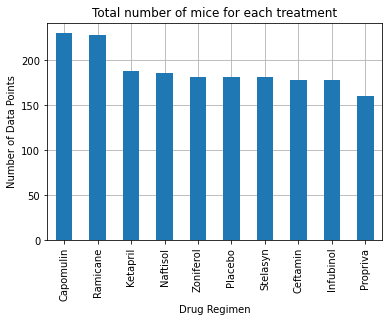

In [92]:
#3. Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the 
#   number of total mice for each treatment regimen throughout the course of the study.
#   NOTE: These plots should look identical.

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
bar_plot = data_df['Drug Regimen'].value_counts().plot.bar(width=0.5, zorder=3)

# Set labels/ title/ grid for the plot
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Total number of mice for each treatment")
bar_plot.grid(zorder=2)

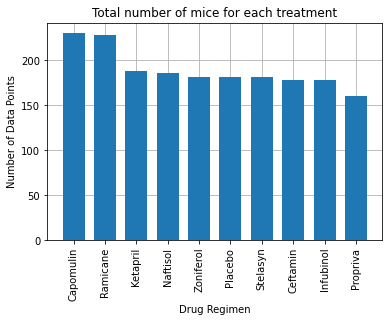

In [93]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Calculate the amount of data points for each drug regimen
counts = data_df['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series and Generate bar blot with the length of the 'counts' series
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, width = 0.7, zorder=3)

# Label the tick marks according to the index values in the 'counts' series and set labels/ title/ grid
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Total number of mice for each treatment')
plt.grid(zorder=3)

# Display plot
plt.show()

Text(0, 0.5, '')

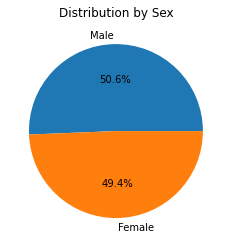

In [94]:
#4. Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that 
    #shows the distribution of female or male mice in the study.NOTE: These plots should look identical.
    
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Identify distribution of data by sex
data = data_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=0, title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')

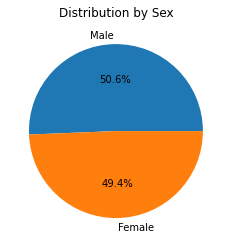

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
data = data_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=0)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [96]:
#5. Calculate the final tumour volume of each mouse across four of the most promising treatment regimens: 
    #Capomulin, Ramicane, Infubinol, and Ceftamin. 
    #Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
    

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(data_df, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [97]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')
    print ('')
    

    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0

IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0

IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1

IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0



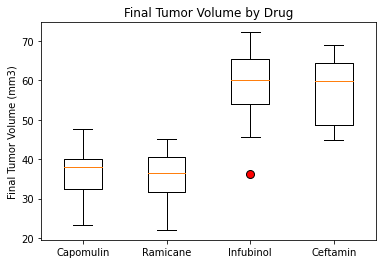

In [98]:
#6. Using Matplotlib, generate a box and whisker plot of the final tumour volume for all four treatment regimens 
# and highlight any potential outliers in the plot by changing their colour and style.
# Hint: All four box plots should be within the same figure. 

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot and Add title and labels to boxplot
plt.boxplot(drug_values, flierprops=flierprops)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

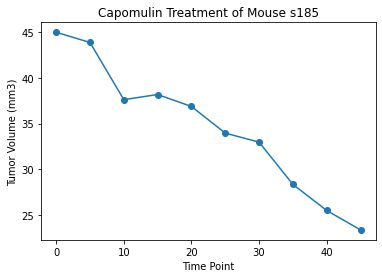

In [99]:
#7. Select a mouse that was treated with Capomulin and 
# generate a line plot of tumour volume vs. time point for that mouse.


# Identify data points of a mouse treated with Capomulin
mouse = data_df.loc[data_df['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis and Add labels and title to plot
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

plt.show()

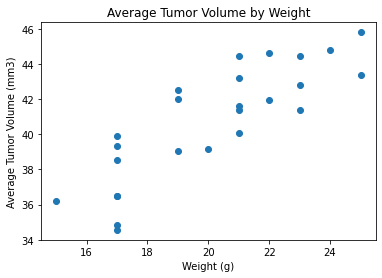

In [100]:
#8. Generate a scatter plot of mouse weight versus average tumour volume for the Capomulin treatment regimen.

# Store data for the Capomulin regimen
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.


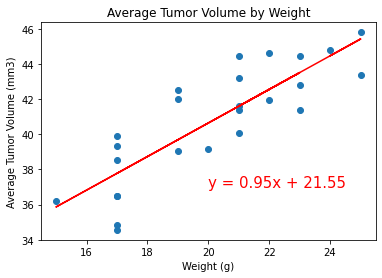

In [101]:
#9. Calculate the correlation coefficient and linear regression model 
# between mouse weight and average tumour volume for the Capomulin treatment. 


# Plot the linear regression model on top of the previous scatter plot - hence commenting out below code to calculate avg tumor volume

#capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
#avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
#avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
#final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
#final_avg_vol_df
#x = final_avg_vol_df['Weight (g)']
#y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot, Annotate linear regression, Add labels and title to plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-") 
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

1. The heavier the mouse, the less effective the drug is (see scatter plot). This is a reliable conclusion because of the strong r-value correlation (0.95) resulting from the linear regression.
2. The results of the study are very consistent and reliable since there is only 1 outlier in the data set for the top drugs.
3. Effectiveness of Capomulin and Ramicane is significantly more than Infubinol and Ceftamine (based on the box plots of the final tumor volumes)